# Brownian Motion

We are going to use our knowledge about classes now to create a colloidal particle class, which we will use for simulations in our first real physics project.

In [6]:
# include the required modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## Class Planning

<div class="alert alert-info">

**Physics project** Colloidal particle class
   
We will define a class for a colloidal particle, which we may use later for our projects as well. This makes sense, as we can have different colloidal particles of different radius for example, which do start to carry out Brownian motion from different positions. A colloidal particle is and object, which has properties very much in the same way as classes intend that. The whole definition requires some planning, especially on what the class should keep track of and what the object.
    
The particle class shall keep track of 
    
    * the total number of colloidal particles
    * the value of k_B T/(6 pi eta) = 2.2e-19 
    
The class shall provide the class specific methods
    
    * how_many() which returns the total number of colloids
    * __str__ which returns a string with radius and position of the particle

</div>

<div class="alert alert-info">

**Physics interlude** Colloidal particle class


    
Each object shall then contain the following properties
    
    * the particle radius, R
    * a list of all x position, x
    * a list of all y position, y
    * the index of the colloid, index
    * the diffusion coefficient given by k_B T/(6 pi eta R), D
    
The object shall provide the following methods
    
    * get_trajectory() return the trajectory as a pandas DataFrame with the columns x and y
    * get_D() return the diffusion coefficient
    * update(dt) do one step of Brownian motion with a time step dt as argument, not return
    
</div>

In [153]:
# Class definition
class Colloid:

    # A class variable, counting the number of Colloids
    number = 0
    f = 2.2e-19 # this is k_B T/(6 pi eta) in m^3/s

    # constructor
    def __init__(self,R, x0=0, y0=0):        
        # add initialisation code here
        self.R=R        
        self.x=[]
        self.y=[]
        self.x.append(x0)
        self.y.append(y0)        
        Colloid.number=Colloid.number+1
        self.index=Colloid.number 
        self.D=Colloid.f/self.R
    
    # method to return the name 
    def get_size(self):
        return(self.R)
    
        
    def get_D(self):        
        return(self.D)
    
    def update(self,dt):           
        self.x.append(self.x[-1]+np.random.normal(0.0, np.sqrt(2*self.D*dt)))
        self.y.append(self.y[-1]+np.random.normal(0.0, np.sqrt(2*self.D*dt)))

    
    def get_trajectory(self):
        return(pd.DataFrame({'x':self.x,'y':self.y}))
    

    
    # class method accessing a class variable
    @classmethod
    def how_many(cls):
        return(Colloid.number)
    
    # insert something that prints the particle position in a formatted way when printing
    def __str__(self):
        return("The particle with radius R={} is at x={},y={}.".format(self.R, self.x, self.y))

## Simulating

With the help of this Colloid class, we would like to carry out simulations of Brownian motion of multiple particles. The simulations shall

* take n=200 particles
* have N=200 trajectory points each
* start all at 0,0
* particle objects should be stored in a list p_list


In [181]:
N=200 # the number of trajectory points
n=200# the number of particles

p_list=[]
dt=0.18

# creating all objects 
for i in range(n):
    p_list.append(Colloid(1e-6,0,0))

    
# simulate all trajectory timesteps for all particles    
for i in range(1,N):
    for (index,p) in enumerate(p_list):
        p.update(dt)    



As a result you shall be able to plot, for example, all data points of the trajectories as shown below.

## Plotting the trajectories

The next step is to plot all the trajectories.

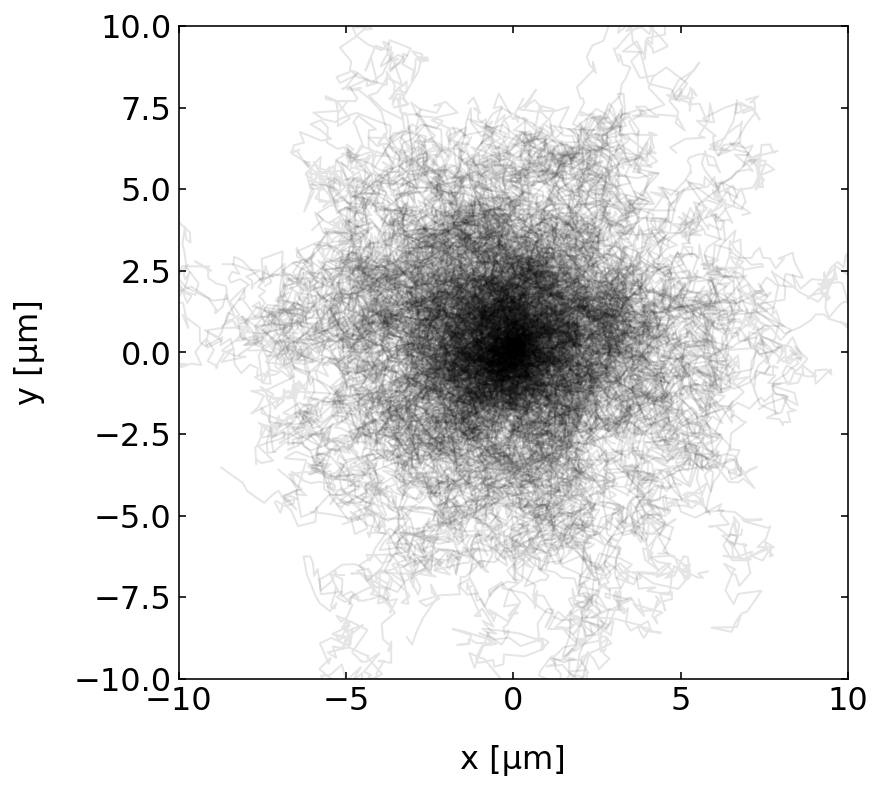

In [169]:
# we take real world diffusion coefficients so scale up the data to avoid nasty exponentials 
scale=1e6

plt.figure(figsize=(6,6))
for i in range(n):
    plt.plot(np.array(p_list[i].x[:])*scale,np.array(p_list[i].y[:])*scale,'k-',alpha=0.1,lw=1)
plt.xlim(-10,10)
plt.ylim(-10,10),
plt.xlabel('x [µm]')
plt.ylabel('y [µm]')
plt.show()

## Characterizing the Brownian otion

### Calculate the particle velocity

We may characterize the motion of such a Brownian particle in different ways. One is to calculate its speed by measuring how far it traveled within a certain time $n\, dt$, where $dt$ is the timestep of out simulation. We can do that as 

\begin{equation}
    v(n\, dt)=\frac{\langle\sqrt{(x_{i+n}-x_{i})^2+(y_{i+n}-y_{i})^2}\rangle}{n\,dt}
\end{equation}

The angular brackets on the top take care of the fact that we can measure the distance traveled within a certain time $n\, dt$ several times along a trajectory. These values can be used to calculate a mean speed.

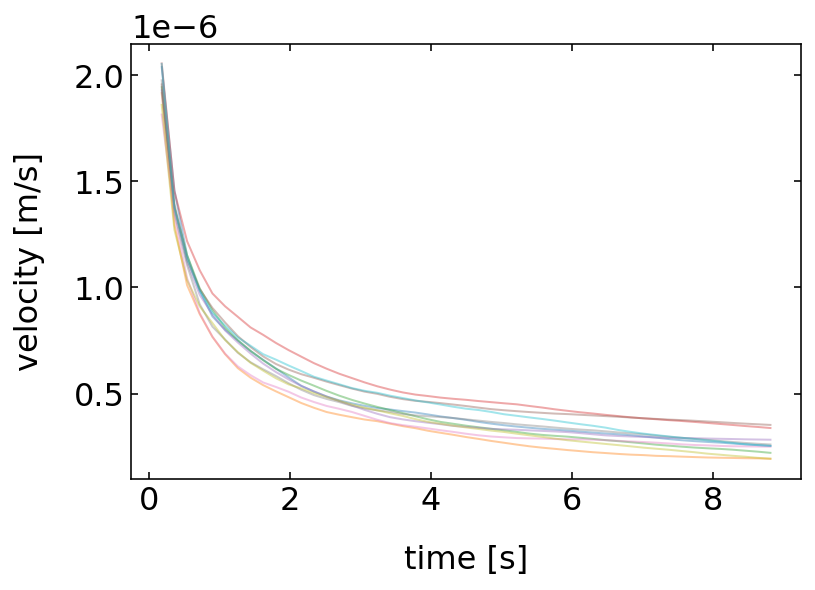

In [194]:
time=np.array(range(1,50))*dt

for j in range(10):
    t=p_list[j].get_trajectory()
    msd=[np.mean(np.sqrt(t.x.diff(i)**2+t.y.diff(i)**2)) for i in range(1,50)]
    msd=msd/time
    plt.plot(time,msd,alpha=0.4)

plt.ylabel('velocity [m/s]')
plt.xlabel('time [s]')    
plt.show()   

### Calculate the particle mean squared displacement

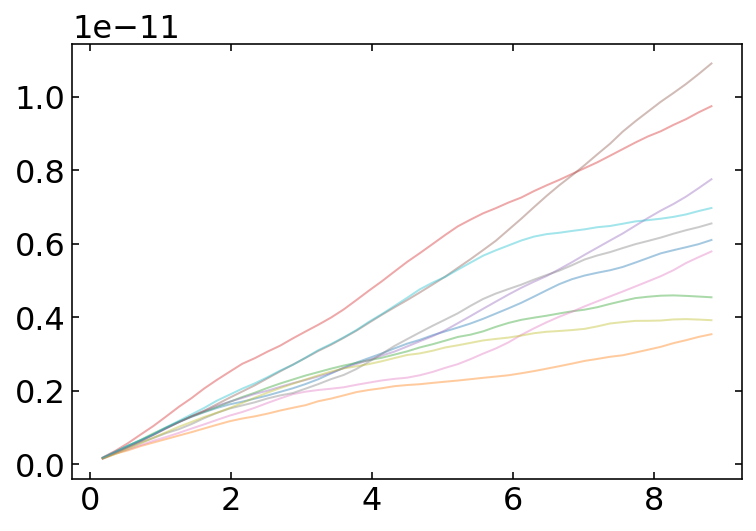

In [186]:
time=np.array(range(1,50))*dt
for j in range(10):
    t=p_list[j].get_trajectory()
    msd=[np.mean(t.x.diff(i).dropna()**2+t.y.diff(i).dropna()**2) for i in range(1,50)]
    plt.plot(time,msd,alpha=0.4)
    

plt.    
plt.show()    

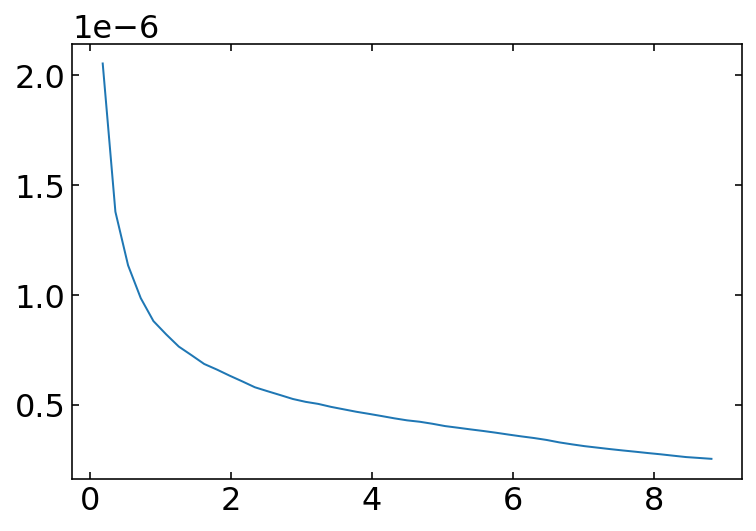

In [191]:
plt.plot(time,msd/time)